In [60]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime


In [61]:
# Files to Load 
cityDataCSV = "data/city_data.csv"
rideDataCSV = "data/ride_data.csv"

In [62]:
# Read the City and Ride Data
dfCity = pd.read_csv(cityDataCSV)
dfRide = pd.read_csv(rideDataCSV)

In [63]:
dfCity.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [64]:
dfRide.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [118]:
#first convert the string to a datatype
dfRide["date"] = pd.to_datetime(dfRide["date"])

dfRide['new_date'] = [d.date() for d in dfRide['date']]
dfRide['new_time'] = [d.time() for d in dfRide['date']]

In [119]:
dfRide.head()

,city,date,fare,ride_id,new_date,new_time
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,2018-01-14,10:14:22
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,2018-03-04,18:24:09
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,2018-02-24,04:29:00
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,2018-02-10,23:22:03
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,2018-03-06,04:28:35


In [120]:
dfRide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 6 columns):
city        2375 non-null object
date        2375 non-null datetime64[ns]
fare        2375 non-null float64
ride_id     2375 non-null int64
new_date    2375 non-null object
new_time    2375 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 111.4+ KB


In [65]:
dfCity.count()

city            120
driver_count    120
type            120
dtype: int64

In [66]:
dfRide.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [67]:
# Merge two dataframes using a full join
#Should only need a left merge.  Chose full in the event there was a city with no driver data.
dfMerge = pd.merge(dfRide, dfCity, how="outer", on="city")
dfMerge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [68]:
dfMerge.count()
#confirm the total count is 2375.  If greater, there was a city without a record in the driver table.

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [69]:
dfMerge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [70]:
#Come back to this.   
#date = datetime.datetime.strptime(dfMerge["date"], "%d %b %Y  %H:%M:%S.%f")


In [71]:
#dfMerge["dateOnly"] = datetime.datetime.strptime(dfMerge["date"], "%Y %b %d")

#### Part A - Create a dataframe with the data needed.
* Step 1, Create a dataframe with the city, average fare, and total number of rides.
* Step 2, Perfrom a merge to get the city type

In [72]:
dfRide.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [73]:
#Number of Rides By City.
RidesByCity = dfRide["city"].value_counts()
print(RidesByCity)

West Angela             39
South Karenland         38
North Jason             35
Liumouth                33
Port Frank              33
South Evanton           31
South Phillip           31
South Michelleport      31
West Robert             31
New Kimberlyborough     30
Justinberg              30
West Anthony            30
Royland                 30
North Jasmine           30
East Kaylahaven         29
Loganberg               28
Karenside               28
Richardfort             28
Hurleymouth             28
West Heidi              28
Josephside              27
East Marymouth          27
Christopherfurt         27
Carriemouth             27
Lake Danielberg         26
West Christopherberg    26
West Josephberg         26
West Samuelburgh        25
Grahamburgh             25
Joneschester            25
                        ..
North Markport          14
Williamsonville         14
Victoriaport            14
Lake Omar               14
North Richardhaven      14
East Kentstad           13
N

In [74]:
dfRideSummary = dfRide.groupby(["city"]).agg({ "fare":'mean',"ride_id":'count'})

In [75]:
#Confirm the counts in my dataframe (dfRideSummary)are the same as the original data (RidesByCity)
#This is an "eyeball" check.   Change to both ascending and descending to compare.
dfRideSummary.sort_values(["ride_id"], ascending=False).head(5)

,fare,ride_id
city,,
West Angela,25.990000,39
South Karenland,26.535526,38
North Jason,22.743714,35
Liumouth,26.150000,33
Port Frank,27.201515,33


In [76]:
#stepA1 is complete
dfRideSummary.head()

,fare,ride_id
city,,
Amandaburgh,24.641667,18
Barajasview,25.332273,22
Barronchester,36.422500,16
Bethanyland,32.956111,18
Bradshawfurt,40.064000,10


In [77]:
#Step A2, Perfrom a merge to get the city type
#this will also bring the unnecessary driver_count column which serves no purpose, but also causes no harm.
dfRideSummaryMerged = pd.merge(dfRideSummary, dfCity, how="left", on=["city", "city"])
dfRideSummaryMerged.head()

,city,fare,ride_id,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


In [91]:
dfRideSummaryMerged.head()

,city,avgFare,totalRides,driverCount,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
6,Carriemouth,28.314444,27,52,Urban
7,Christopherfurt,24.501852,27,41,Urban
10,Deanville,25.842632,19,49,Urban


In [92]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = dfMerge[dfMerge["type"] == "Urban"]
suburban_cities = dfMerge[dfMerge["type"] == "Suburban"]
rural_cities = dfMerge[dfMerge["type"] == "Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

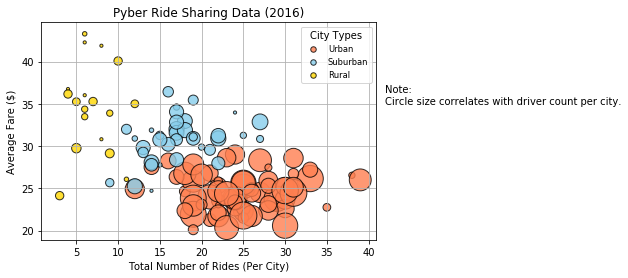

In [106]:
# Build the scatter plots for each city types
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

#
#plt.tight_layout()

# Save Figure
plt.savefig("Fig1.png")
plt.savefig("myfile.png", bbox_inches = "tight")

# Show plot
plt.show()

In [78]:
#Change the labels so they are logical
dfRideSummaryMerged = dfRideSummaryMerged.rename(columns={"fare": "avgFare", 
                                              "ride_id": "totalRides",
                                              "driver_count": "driverCount"
                                             })
dfRideSummaryMerged.head(20)

,city,avgFare,totalRides,driverCount,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural
5,Brandonfort,35.437368,19,10,Suburban
6,Carriemouth,28.314444,27,52,Urban
7,Christopherfurt,24.501852,27,41,Urban
8,Colemanland,30.894545,22,23,Suburban
9,Davidfurt,31.995882,17,23,Suburban


In [79]:
#determine if the datatypes can be used for graphing.  ie, numeric
dfRideSummaryMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 5 columns):
city           120 non-null object
avgFare        120 non-null float64
totalRides     120 non-null int64
driverCount    120 non-null int64
type           120 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 5.6+ KB


In [80]:
#Step A2 complete
dfRideSummaryMerged.head()

,city,avgFare,totalRides,driverCount,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


### Part B - Create the Scatter Chart
*Step 1 create a scatter chart for the urban drivers 
<br>X axis is the average fare and y axis is the total rides

*Step 2 add the other city types

In [81]:
# Determine the maximum x value for the chart.  x axis is the average fare  
fareMax = dfRideSummaryMerged["avgFare"].max()
print(fareMax)

43.278333333333336


In [82]:
#count the number of fares
fareCount = dfRideSummaryMerged["avgFare"].count()
print(fareCount)

120


In [83]:
#count the number of total rides
rideCount = dfRideSummaryMerged["totalRides"].count()
print(rideCount)

120


In [84]:
# y values will come from dfRideSummaryMerged["totalRides"]

In [85]:
groups = dfRideSummaryMerged.groupby('type')

In [86]:
colors = ["Gold", "SkyBlue", "Coral"]

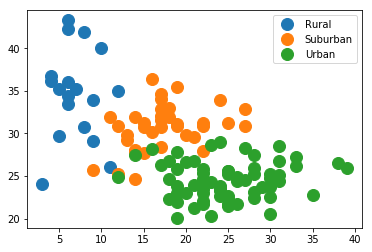

In [87]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for type, dfRideSummaryMerged in groups:
    ax.plot(dfRideSummaryMerged['totalRides'], dfRideSummaryMerged['avgFare'], marker='o', linestyle='', ms=12, label=type)
ax.legend()

plt.show()

AttributeError: 'DataFrame' object has no attribute 'x'

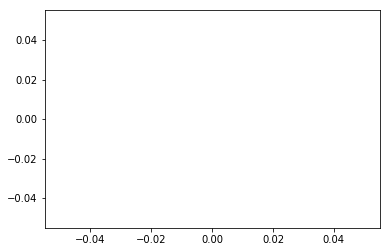

In [88]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', s=10+dfRideSummaryMerged['avgFare']*0.01, label=name)
ax.legend()


In [ ]:
fig, ax = plt.subplots()
for i, (type, dfRideSummaryMerged) in enumerate(groups):
    dfRideSummaryMerged.plot(kind='scatter', x=dfRideSummaryMerged['totalRides'], y= dfRideSummaryMerged['avgFare'], s=10+dfRideSummaryMerged['avgFare']*0.01, label=type, ax=ax, color=colors[i])
#lgd = ax.legend(numpoints=1)


### Pie Chart

In [ ]:
#start with the merged data
dfRideSummaryMerged.head(20)


In [ ]:
#Create a dataframe for the total fare by city type
dfFareByCity = dfRideSummaryMerged.groupby("type").agg({"avgFare":'sum'})


In [ ]:
dfFareByCity.head()

In [ ]:
# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, .5) #higher the number the more the explosion